<a href="https://www.kaggle.com/code/concyclics/people-s-daily-wordcloud-visualization?scriptVersionId=102021110" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# People's Daily WordCloud Visualization
#### Author: Concyclics

## Content
In this notebook, we are going to introduce jieba to split chinese words and introduce *wordcloud* to generate a visualization of news keyword like below.
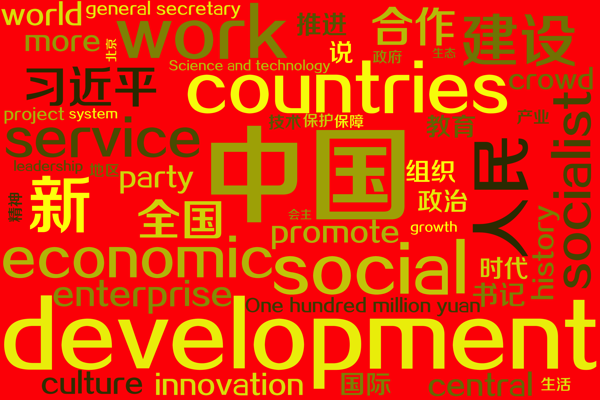

And also we will use *zhon* and some other method to clean the word data.

**Document of  WordCloud**

http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

**basic parameters**

<dl class="field-list">
<dt class="field-odd">Parameters</dt>
<dd class="field-odd"><dl>
<dt><strong>font_path</strong><span class="classifier">string</span></dt><dd><p>Font path to the font that will be used (OTF or TTF).
Defaults to DroidSansMono path on a Linux machine. If you are on
another OS or don’t have this font, you need to adjust this path.</p>
</dd>
<dt><strong>width</strong><span class="classifier">int (default=400)</span></dt><dd><p>Width of the canvas.</p>
</dd>
<dt><strong>height</strong><span class="classifier">int (default=200)</span></dt><dd><p>Height of the canvas.</p>
</dd>
<dt><strong>prefer_horizontal</strong><span class="classifier">float (default=0.90)</span></dt><dd><p>The ratio of times to try horizontal fitting as opposed to vertical.
If prefer_horizontal &lt; 1, the algorithm will try rotating the word
if it doesn’t fit. (There is currently no built-in way to get only
vertical words.)</p>
</dd>
<dt><strong>mask</strong><span class="classifier">nd-array or None (default=None)</span></dt><dd><p>If not None, gives a binary mask on where to draw words. If mask is not
None, width and height will be ignored and the shape of mask will be
used instead. All white (#FF or #FFFFFF) entries will be considerd
“masked out” while other entries will be free to draw on. [This
changed in the most recent version!]</p>
</dd>
<dt><strong>contour_width: float (default=0)</strong></dt><dd><p>If mask is not None and contour_width &gt; 0, draw the mask contour.</p>
</dd>
<dt><strong>contour_color: color value (default=”black”)</strong></dt><dd><p>Mask contour color.</p>
</dd>
<dt><strong>scale</strong><span class="classifier">float (default=1)</span></dt><dd><p>Scaling between computation and drawing. For large word-cloud images,
using scale instead of larger canvas size is significantly faster, but
might lead to a coarser fit for the words.</p>
</dd>
<dt><strong>min_font_size</strong><span class="classifier">int (default=4)</span></dt><dd><p>Smallest font size to use. Will stop when there is no more room in this
size.</p>
</dd>
<dt><strong>font_step</strong><span class="classifier">int (default=1)</span></dt><dd><p>Step size for the font. font_step &gt; 1 might speed up computation but
give a worse fit.</p>
</dd>
<dt><strong>max_words</strong><span class="classifier">number (default=200)</span></dt><dd><p>The maximum number of words.</p>
</dd>
<dt><strong>stopwords</strong><span class="classifier">set of strings or None</span></dt><dd><p>The words that will be eliminated. If None, the build-in STOPWORDS
list will be used. Ignored if using generate_from_frequencies.</p>
</dd>
<dt><strong>background_color</strong><span class="classifier">color value (default=”black”)</span></dt><dd><p>Background color for the word cloud image.</p>
</dd>
<dt><strong>max_font_size</strong><span class="classifier">int or None (default=None)</span></dt><dd><p>Maximum font size for the largest word. If None, height of the image is
used.</p>
</dd>
<dt><strong>mode</strong><span class="classifier">string (default=”RGB”)</span></dt><dd><p>Transparent background will be generated when mode is “RGBA” and
background_color is None.</p>
</dd>
<dt><strong>relative_scaling</strong><span class="classifier">float (default=’auto’)</span></dt><dd><p>Importance of relative word frequencies for font-size.  With
relative_scaling=0, only word-ranks are considered.  With
relative_scaling=1, a word that is twice as frequent will have twice
the size.  If you want to consider the word frequencies and not only
their rank, relative_scaling around .5 often looks good.
If ‘auto’ it will be set to 0.5 unless repeat is true, in which
case it will be set to 0.</p>
</dd>
<dt><strong>color_func</strong><span class="classifier">callable, default=None</span></dt><dd><p>Callable with parameters word, font_size, position, orientation,
font_path, random_state that returns a PIL color for each word.
Overwrites “colormap”.
See colormap for specifying a matplotlib colormap instead.
To create a word cloud with a single color, use
<code class="docutils literal notranslate"><span class="pre">color_func=lambda</span> <span class="pre">*args,</span> <span class="pre">**kwargs:</span> <span class="pre">"white"</span></code>.
The single color can also be specified using RGB code. For example
<code class="docutils literal notranslate"><span class="pre">color_func=lambda</span> <span class="pre">*args,</span> <span class="pre">**kwargs:</span> <span class="pre">(255,0,0)</span></code> sets color to red.</p>
</dd>
<dt><strong>regexp</strong><span class="classifier">string or None (optional)</span></dt><dd><p>Regular expression to split the input text into tokens in process_text.
If None is specified, <code class="docutils literal notranslate"><span class="pre">r"\w[\w']+"</span></code> is used. Ignored if using
generate_from_frequencies.</p>
</dd>
<dt><strong>collocations</strong><span class="classifier">bool, default=True</span></dt><dd><p>Whether to include collocations (bigrams) of two words. Ignored if using
generate_from_frequencies.</p>
</dd>
<dt><strong>colormap</strong><span class="classifier">string or matplotlib colormap, default=”viridis”</span></dt><dd><p>Matplotlib colormap to randomly draw colors from for each word.
Ignored if “color_func” is specified.</p>
</dd>
<dt><strong>normalize_plurals</strong><span class="classifier">bool, default=True</span></dt><dd><p>Whether to remove trailing ‘s’ from words. If True and a word
appears with and without a trailing ‘s’, the one with trailing ‘s’
is removed and its counts are added to the version without
trailing ‘s’ – unless the word ends with ‘ss’. Ignored if using
generate_from_frequencies.</p>
</dd>
<dt><strong>repeat</strong><span class="classifier">bool, default=False</span></dt><dd><p>Whether to repeat words and phrases until max_words or min_font_size
is reached.</p>
</dd>
<dt><strong>include_numbers</strong><span class="classifier">bool, default=False</span></dt><dd><p>Whether to include numbers as phrases or not.</p>
</dd>
<dt><strong>min_word_length</strong><span class="classifier">int, default=0</span></dt><dd><p>Minimum number of letters a word must have to be included.</p>
</dd>
<dt><strong>collocation_threshold: int, default=30</strong></dt><dd><p>Bigrams must have a Dunning likelihood collocation score greater than this
parameter to be counted as bigrams. Default of 30 is arbitrary.</p>
<p>See Manning, C.D., Manning, C.D. and Schütze, H., 1999. Foundations of
Statistical Natural Language Processing. MIT press, p. 162
<a class="reference external" href="https://nlp.stanford.edu/fsnlp/promo/colloc.pdf#page=22">https://nlp.stanford.edu/fsnlp/promo/colloc.pdf#page=22</a></p>
</dd>
</dl>
</dd>
</dl>

**basic methods**

<div class="wy-table-responsive"><table class="longtable docutils align-default">
<colgroup>
<col style="width: 10%">
<col style="width: 90%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">fit_words</span></code>(frequencies)</p></td>
<td><p>Create a word_cloud from words and frequencies.</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">generate</span></code>(text)</p></td>
<td><p>Generate wordcloud from text.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">generate_from_frequencies</span></code>(frequencies[,&nbsp;…])</p></td>
<td><p>Create a word_cloud from words and frequencies.</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">generate_from_text</span></code>(text)</p></td>
<td><p>Generate wordcloud from text.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">process_text</span></code>(text)</p></td>
<td><p>Splits a long text into words, eliminates the stopwords.</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">recolor</span></code>([random_state,&nbsp;color_func,&nbsp;colormap])</p></td>
<td><p>Recolor existing layout.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">to_array</span></code>()</p></td>
<td><p>Convert to numpy array.</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">to_file</span></code>(filename)</p></td>
<td><p>Export to image file.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">to_svg</span></code>([embed_font,&nbsp;optimize_embedded_font,&nbsp;…])</p></td>
<td><p>Export to SVG.</p></td>
</tr>
</tbody>
</table></div>

## 1. Load and split

### 1.1 Load newspath

In [1]:
import os

newspath=[]
for dirname, _, filenames in os.walk('../input/renmindaily/data'):
    for filename in filenames:
        newspath.append(os.path.join(dirname, filename))

print("total news: ",len(newspath))

total news:  40390


### 1.2 Preview of news

In [2]:
from random import sample
for eachpath in sample(newspath,k=2):
    print("path: ", eachpath)
    with open(eachpath,'r') as f:
        news=f.read()
        print(news)
        print('\n\n')
    

path:  ../input/renmindaily/data/RenMin_Daily/20211112-20-01.txt

向生活学习 为人民服务（创造性转化创新性发展纵横谈）

　　核心阅读
　　人民需要艺术，艺术更需要人民。再好的艺术如果只是自己懂，自娱自乐，价值能有多大？文艺说到底要为人民服务
　　歌剧译配是一种创造性劳动：好的译配不仅能实现意义的传达，还能完成意境的重塑，使作品更加完美
　　一部音乐作品能否经久流传，是一代代观众选择的结果。节目单上最频繁出现的作品，一定是深受大众喜爱的作品，这些作品的创作经验值得我们认真研究
　　这粒“为人民”“为社会”的种子，是青少年时期就种下的，伴随我人生阅历的丰富逐渐生根发芽、枝繁叶茂
　
　　“兴于诗，立于礼，成于乐。”中国文化自古以来就很看重音乐对人生的滋养、对性格的塑造。岁月静好时，音乐是人们日常生活的陪伴；需要众人同仇敌忾时，音乐更能凝聚人心。抗日战争时期，人们唱着“起来，不愿做奴隶的人们”，唤起民族觉醒；抗美援朝时期，“雄赳赳、气昂昂”的歌声表达中国人民志愿军战士英勇无畏的气概。
　　不同的文化创造了不同的音乐，其中的优秀作品、经典曲目是人类共同的精神财富，应该发扬光大，为人们所共享。作为新中国培养的第一代指挥家，我最看重的事业，就是在“难懂”的交响乐、歌剧和人民群众之间架起桥梁，使人们能够享受音乐之美，获得精神的愉悦和陶冶。在实践中，我切实感受到人们对好音乐的强烈需求，这促使我全力以赴做好音乐普及工作，一做就是一辈子。
　　帮助人们领略璀璨“明珠”
　　人民需要艺术，艺术更需要人民。再好的艺术如果只是自己懂，自娱自乐，价值能有多大？文艺说到底要为人民服务。歌剧是西方音乐宝库中的璀璨明珠，我推动“洋戏中唱”，就是为了帮助人们深入领略这门艺术的魅力。
　　上世纪80年代，中文版意大利歌剧《茶花女》在天津演出，一个多月连演39场，每场2000多观众，场场爆满。我和青年译者孙慧双合作配歌的法国歌剧《卡门》演出了100多场，也受到观众的喜爱。100多年前，奥地利作曲家马勒受李白等中国古代诗人启发，创作了《尘世之歌》，成为世界顶级交响乐团常奏曲目。原作用德文演唱，2017年我在国家大剧院指挥了译配为中文的《尘世之歌》。这是在“中为洋用”之后，再让它“洋为中用”，从而使我们的观众既能听懂它原初的意涵，又能了解外国

### 1.3 View the split of JieBa

In [3]:
import jieba

from random import sample
for eachpath in sample(newspath,k=1):
    #print("path: ", eachpath)
    with open(eachpath,'r') as f:
        news=f.read()
        print('origin news: ')
        print(news)
        
        print('split by simple mode: ')
        print("/".join(jieba.lcut(news)))
        
        print('split by cut_all mode: ')
        print("/".join(jieba.lcut(news, cut_all=True)))
        
        print('split by search mode: ')
        print("/".join(jieba.lcut_for_search(news)))

Building prefix dict from the default dictionary ...


origin news: 

全国脱贫攻坚先进个人名单（1981名）

　　北京市
　　康柏利  北京市延庆区第一职业学校汽车工程系副主任
　　刘长安  北京凯达恒业农业技术开发有限公司董事长兼总经理
　　任  轶  西藏自治区拉萨市人民医院党委副书记、院长（挂职），北京积水潭医院原办公室主任
　　吴进宝  北京银行股份有限公司乌鲁木齐分行驻新疆和田市吉亚乡阿孜乃巴扎村第一书记、工作队队长
　　秦俊彪  首钢新闻中心专题室副主任
　　孙金成  西藏自治区拉萨市发展和改革委员会副主任（挂职），北京市扶贫协作和支援合作工作领导小组西藏拉萨指挥部项目部部长
　　邓鹏翔  新疆维吾尔自治区和田地区发展和改革委员会党组成员、副主任（挂职），北京市扶贫协作和支援合作工作领导小组新疆和田指挥部规划财务部部长
　　马  晨（回族）  青海省玉树藏族自治州委组织部副部长（挂职），北京市扶贫协作和支援合作工作领导小组青海玉树指挥部党委委员、综合办公室主任、宣传和人力资源部部长
　　闫新疆  内蒙古自治区赤峰市扶贫开发办公室综合科副科长（挂职），北京北广传媒移动电视有限公司办公室主任
　　刘金波  河北省张家口市怀安县委常委、副县长（挂职），北京市怀柔区九渡河镇政府副处职
　　张  杰  北京经济技术开发区经济发展局协同合作处处长
　　张  嵩  北京市东城区对外联络服务办公室综合科科长
　　张  钧  东北师范大学附属中学朝阳学校副校长
　　马向涛  北京市海淀区医院管理中心副主任
　　安钟岩（女）  北京丰顺工贸集团董事长兼总经理
　　贺迎潮（女）  北京市石景山区接受捐赠事务管理中心主任，北京市石景山区慈善协会秘书长
　　管浩明  北京市门头沟区人力资源和社会保障局一级主任科员
　　蒋京春  北京市通州区大杜社中学教师
　　许  静（女）  北京市顺义区政府投资项目资金运行服务中心主任
　　戚学政  北京市昌平区中医医院医生
　　雷  剑（土家族）  中国中医科学院广安门医院南区医生，北京市大兴区麻醉质量控制中心副主任
　　魏学东  拉萨北京实验中学教师，北京市怀柔区第一中学教师
　　李广富  平洛森浓农业科技有限公司总经理
　　李  磊  内蒙古自治区赤峰市巴林右旗扶贫办副主任（挂职），北京市密云区应急管理局执法监察大队队长
　　池凤英（女）  北京市延庆区卫生健康委一级主任科员

Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.415 seconds.
Prefix dict has been built successfully.



/全国/脱贫/攻坚/先进个人/名单/（/1981/名/）/
/
/　/　/北京市/
/　/　/康柏利/ / /北京市/延庆/区/第一/职业/学校/汽车/工程系/副/主任/
/　/　/刘/长安/ / /北京/凯达/恒业/农业/技术开发/有限公司/董事长/兼/总经理/
/　/　/任/ / /轶/ / /西藏自治区/拉萨市/人民/医院/党委/副/书记/、/院长/（/挂职/）/，/北京积水潭医院/原/办公室/主任/
/　/　/吴/进宝/ / /北京/银行/股份/有限公司/乌鲁木齐/分行/驻/新疆/和田市/吉亚乡/阿孜乃/巴扎/村/第一书记/、/工作队/队长/
/　/　/秦俊彪/ / /首钢/新闻/中心/专题/室/副/主任/
/　/　/孙金成/ / /西藏自治区/拉萨市/发展/和/改革/委员会/副/主任/（/挂职/）/，/北京市/扶贫/协作/和/支援/合作/工作/领导小组/西藏/拉萨/指挥部/项目部/部长/
/　/　/邓鹏翔/ / /新疆维吾尔自治区/和田地区/发展/和/改革/委员会/党组/成员/、/副/主任/（/挂职/）/，/北京市/扶贫/协作/和/支援/合作/工作/领导小组/新疆/和田/指挥部/规划/财务部/部长/
/　/　/马/ / /晨/（/回族/）/ / /青海省/玉树藏族自治州/委/组织部/副/部长/（/挂职/）/，/北京市/扶贫/协作/和/支援/合作/工作/领导小组/青海/玉树/指挥部/党委委员/、/综合/办公室/主任/、/宣传/和/人力资源部/部长/
/　/　/闫/新疆/ / /内蒙古自治区/赤峰市/扶贫开发/办公室/综合/科/副科长/（/挂职/）/，/北京/北广/传媒/移动/电视/有限公司/办公室/主任/
/　/　/刘金波/ / /河北省/张家口市/怀安/县委/常委/、/副县长/（/挂职/）/，/北京市/怀柔区/九渡河镇/政府/副处/职/
/　/　/张/ / /杰/ / /北京经济技术开发区/经济/发展局/协同/合作/处处长/
/　/　/张/ / /嵩/ / /北京市/东城区/对外/联络/服务/办公室/综合/科科长/
/　/　/张/ / /钧/ / /东北师范大学/附属中学/朝阳/学校/副校长/
/　/　/马向涛/ / /北京市/海淀区/医院/管理中心/副/主任/
/　/　/安钟岩/（/女/）/ / /北京/丰顺/工贸/集团/董事长/兼/总经理/
/　/　

The search mode best fits what we want. It split each possible keywords.

### 1.4 remove space, number and punctuations

#### 1.4.1 remove punctuation before split

In [4]:
!pip install zhon

     |████████████████████████████████| 99 kB 1.7 MB/s             
  Preparing metadata (setup.py) ... - done
  Created wheel for zhon: filename=zhon-1.1.5-py3-none-any.whl size=84322 sha256=184b6389f8f6aa468c2a0167fa02b8c2137bcfcc4de265148674541db04be8cc
  Stored in directory: /root/.cache/pip/wheels/d0/56/17/2675c4c7413a72bf173062e8d0a16503e3b2607745aa84988d
Successfully built zhon


In [5]:
import re
from zhon.hanzi import punctuation as puncZH
from string import punctuation as puncEN

def removePunctuation(s:str):
    s=re.sub(r"[%s]+" %puncZH, "",s)
    s=re.sub(r"[%s]+" %puncEN, "",s)
    s=re.sub(r"[\d\n\t\r]+", "",s)
    return s

In [6]:
from random import choice

news = open(choice(newspath),'r').read()
print(news)

黑龙江两名90后特岗教师组建音乐班
村里的孩儿 乘着歌声翱翔

　　核心阅读
　　黑龙江安达市任民镇中心小学的两名90后教师在学校组建音乐班，并把学生们练唱的点滴录制成视频，在短视频平台上引起许多关注。音乐让孩子们更加开朗自信，孩子们也用歌声带给更多人温暖与感动。
　　
　　“暖阳下我迎芬芳，为家乡把歌唱，黑色的土地多么宽广，养育了我成长……”中午11点半，教学楼一楼的多媒体会议室又热闹起来，30多名孩子跟着伴奏齐声歌唱。李平站在讲台上打着节奏，随着旋律的变化做出击掌、挥舞手臂的动作。张雨则拿着手机在一旁拍摄记录。
　　李平和张雨是黑龙江省安达市任民镇中心小学的两名90后音乐教师，大学毕业后经过特岗教师选聘来到这里工作。2019年3月，他们在校内组建了“村里的孩儿”音乐班，利用午休时间教孩子们唱歌、弹琴，还通过改编流行歌曲让孩子们爱上音乐，得到许多网友的关注。
　　“希望孩子们借助音乐的力量展翅翱翔”
　　驱车从安达市区出发，40多分钟后才到达任民镇中心小学，学校围墙外是广袤的农田。校长闫可说，学生来自周边的各个村屯，班里的孩子约1/3是留守儿童。
　　2016年，李平通过特岗教师招聘来到学校担任音乐老师，“我刚来的时候，学生基本没有上过音乐课，和城里孩子大多活泼开朗不同，有的孩子很内向，甚至有些自卑，唱歌的时候不敢张口。”2018年来到学校的张雨也有同样的感受，“有些孩子的声音条件非常好，我们想单独培养一下，也给孩子多一点关爱。”
　　一拍即合的俩人在2019年春季学期正式组建了“村里的孩儿”音乐班。“第一批学员是6个比较有天赋的孩子，每天利用午休时间进行一对一辅导。”李平说。
　　一开始，教室里传出的歌声吸引了不少孩子趴在门口和窗台上围观。李平打开门问孩子们：“想不想一起来参加？”却得到几句怯生生的回答：“不想。”
　　“不是不想，其实是不好意思。”李平懂得孩子的心思，他和张雨索性把孩子们“撵”进了教室，没几天工夫，音乐班成员一下子增加到30多人。
　　“克服紧张没有捷径，只有多练习。”他们让孩子挨个上台演唱，“唱错了就重头来过，唱对了，我们在台下热烈鼓掌。”他们发现，台上孩子在唱时，台下的孩子跟着齐声哼唱，还伴着节奏摇摆身体、挥动手臂，一反上台的忸怩神态。
　　“村里的孩儿”这个名字是李平取的，他还给音乐班设计了标志，“一个不规则的大写字母C，看上去又像L，是

In [7]:
print(removePunctuation(news))

黑龙江两名后特岗教师组建音乐班村里的孩儿 乘着歌声翱翔核心阅读黑龙江安达市任民镇中心小学的两名后教师在学校组建音乐班并把学生们练唱的点滴录制成视频在短视频平台上引起许多关注音乐让孩子们更加开朗自信孩子们也用歌声带给更多人温暖与感动暖阳下我迎芬芳为家乡把歌唱黑色的土地多么宽广养育了我成长中午点半教学楼一楼的多媒体会议室又热闹起来多名孩子跟着伴奏齐声歌唱李平站在讲台上打着节奏随着旋律的变化做出击掌挥舞手臂的动作张雨则拿着手机在一旁拍摄记录李平和张雨是黑龙江省安达市任民镇中心小学的两名后音乐教师大学毕业后经过特岗教师选聘来到这里工作年月他们在校内组建了村里的孩儿音乐班利用午休时间教孩子们唱歌弹琴还通过改编流行歌曲让孩子们爱上音乐得到许多网友的关注希望孩子们借助音乐的力量展翅翱翔驱车从安达市区出发多分钟后才到达任民镇中心小学学校围墙外是广袤的农田校长闫可说学生来自周边的各个村屯班里的孩子约是留守儿童年李平通过特岗教师招聘来到学校担任音乐老师我刚来的时候学生基本没有上过音乐课和城里孩子大多活泼开朗不同有的孩子很内向甚至有些自卑唱歌的时候不敢张口年来到学校的张雨也有同样的感受有些孩子的声音条件非常好我们想单独培养一下也给孩子多一点关爱一拍即合的俩人在年春季学期正式组建了村里的孩儿音乐班第一批学员是个比较有天赋的孩子每天利用午休时间进行一对一辅导李平说一开始教室里传出的歌声吸引了不少孩子趴在门口和窗台上围观李平打开门问孩子们想不想一起来参加却得到几句怯生生的回答不想不是不想其实是不好意思李平懂得孩子的心思他和张雨索性把孩子们撵进了教室没几天工夫音乐班成员一下子增加到多人克服紧张没有捷径只有多练习他们让孩子挨个上台演唱唱错了就重头来过唱对了我们在台下热烈鼓掌他们发现台上孩子在唱时台下的孩子跟着齐声哼唱还伴着节奏摇摆身体挥动手臂一反上台的忸怩神态村里的孩儿这个名字是李平取的他还给音乐班设计了标志一个不规则的大写字母C看上去又像L是村里的拼音首字母旁边是一只小鸟希望孩子们借助音乐的力量展翅翱翔让孩子们看到自己的变化和进步音乐班成立之初李平就用手机记录下孩子们练歌的片段并发布到短视频平台用视频做记录让孩子们看到自己的变化和进步以后他们毕业长大看到视频也会想起以前那段快乐的日子李平说训练了一段时间后他们发现孩子们对流行歌曲特别感兴趣有的听上一两遍就能记住旋律可有些流行歌曲的歌词并不适合这个

In [8]:
print("/".join(jieba.lcut_for_search(news)))
print("/".join(jieba.lcut_for_search(removePunctuation(news))))

龙江/黑龙江/两名/90/后/特岗/教师/组建/音乐/班/
/村里/的/孩儿/ /乘着/歌声/翱翔/
/
/　/　/核心/阅读/
/　/　/龙江/黑龙江/安达/安达市/任民/镇/中心/小学/中心小学/的/两名/90/后/教师/在/学校/组建/音乐/班/，/并/把/学生/们/练唱/的/点滴/录制/成/视频/，/在/短/视频/平台/上/引起/许多/关注/。/音乐/让/孩子/们/更加/开朗/自信/，/孩子/们/也/用/歌声/带给/更多/更多人/温暖/与/感动/。/
/　/　/
/　/　/“/暖阳下/我/迎/芬芳/，/为/家乡/把/歌唱/，/黑色/的/土地/多么/宽广/，/养育/了/我/成长/…/…/”/中午/11/点半/，/教学/教学楼/一楼/的/媒体/多媒体/会议/会议室/又/热闹/起来/，/30/多名/孩子/跟着/伴奏/齐声/歌唱/。/李平/站/在/讲台/上/打着/节奏/，/随着/旋律/的/变化/做出/击掌/、/挥舞/手臂/的/动作/。/张雨则/拿/着/手机/在/一旁/拍摄/记录/。/
/　/　/李/平和/张雨/是/龙江/黑龙江/黑龙江省/安达/安达市/任民/镇/中心/小学/中心小学/的/两名/90/后/音乐/教师/，/大学/毕业/大学毕业/后/经过/特岗/教师/选聘/来到/这里/工作/。/2019/年/3/月/，/他们/在/校内/组建/了/“/村里/的/孩儿/”/音乐/班/，/利用/午休/时间/教/孩子/们/唱歌/、/弹琴/，/还/通过/改编/流行/歌曲/流行歌/流行歌曲/让/孩子/们/爱/上/音乐/，/得到/许多/网友/的/关注/。/
/　/　/“/希望/孩子/们/借助/音乐/的/力量/展翅/翱翔/”/
/　/　/驱车/从/安达/市区/出发/，/40/多分/分钟/多分钟/后/才/到达/任民/镇/中心/小学/中心小学/，/学校/围墙/外是/广袤/的/农田/。/校长/可说/闫可说/，/学生/来自/周边/的/各个/村屯/，/班里/的/孩子/约/1///3/是/留守/儿童/。/
/　/　/2016/年/，/李平/通过/特岗/教师/招聘/来到/学校/担任/音乐/老师/，/“/我/刚来/的/时候/，/学生/基本/没有/上/过/音乐/音乐课/，/和/城里/孩子/大多/活泼/开朗/活泼开朗/不同/，/有/的/孩子/很/内向/，/甚至/有些/自卑/，/唱歌/的/时候/不敢/张口/。

#### 1.4.2 remove after split

In [9]:
import re
from zhon.hanzi import punctuation as puncZH
from string import punctuation as puncEN

def hasPunctuation(s:str):
    f=False
    f|=bool(re.match(r"[%s]+" %puncZH, s))
    f|=bool(re.match(r"[%s]+" %puncEN, s))
    f|=bool(re.match(r"[\d\n\t\r]+", s))
    return f

In [10]:
split_news=jieba.lcut_for_search(news)
removed_split_news=[]
for text in split_news:
    if hasPunctuation(text) is False:
        removed_split_news.append(text)

print("/".join(jieba.lcut_for_search(news)))
print("/".join(removed_split_news))

龙江/黑龙江/两名/90/后/特岗/教师/组建/音乐/班/
/村里/的/孩儿/ /乘着/歌声/翱翔/
/
/　/　/核心/阅读/
/　/　/龙江/黑龙江/安达/安达市/任民/镇/中心/小学/中心小学/的/两名/90/后/教师/在/学校/组建/音乐/班/，/并/把/学生/们/练唱/的/点滴/录制/成/视频/，/在/短/视频/平台/上/引起/许多/关注/。/音乐/让/孩子/们/更加/开朗/自信/，/孩子/们/也/用/歌声/带给/更多/更多人/温暖/与/感动/。/
/　/　/
/　/　/“/暖阳下/我/迎/芬芳/，/为/家乡/把/歌唱/，/黑色/的/土地/多么/宽广/，/养育/了/我/成长/…/…/”/中午/11/点半/，/教学/教学楼/一楼/的/媒体/多媒体/会议/会议室/又/热闹/起来/，/30/多名/孩子/跟着/伴奏/齐声/歌唱/。/李平/站/在/讲台/上/打着/节奏/，/随着/旋律/的/变化/做出/击掌/、/挥舞/手臂/的/动作/。/张雨则/拿/着/手机/在/一旁/拍摄/记录/。/
/　/　/李/平和/张雨/是/龙江/黑龙江/黑龙江省/安达/安达市/任民/镇/中心/小学/中心小学/的/两名/90/后/音乐/教师/，/大学/毕业/大学毕业/后/经过/特岗/教师/选聘/来到/这里/工作/。/2019/年/3/月/，/他们/在/校内/组建/了/“/村里/的/孩儿/”/音乐/班/，/利用/午休/时间/教/孩子/们/唱歌/、/弹琴/，/还/通过/改编/流行/歌曲/流行歌/流行歌曲/让/孩子/们/爱/上/音乐/，/得到/许多/网友/的/关注/。/
/　/　/“/希望/孩子/们/借助/音乐/的/力量/展翅/翱翔/”/
/　/　/驱车/从/安达/市区/出发/，/40/多分/分钟/多分钟/后/才/到达/任民/镇/中心/小学/中心小学/，/学校/围墙/外是/广袤/的/农田/。/校长/可说/闫可说/，/学生/来自/周边/的/各个/村屯/，/班里/的/孩子/约/1///3/是/留守/儿童/。/
/　/　/2016/年/，/李平/通过/特岗/教师/招聘/来到/学校/担任/音乐/老师/，/“/我/刚来/的/时候/，/学生/基本/没有/上/过/音乐/音乐课/，/和/城里/孩子/大多/活泼/开朗/活泼开朗/不同/，/有/的/孩子/很/内向/，/甚至/有些/自卑/，/唱歌/的/时候/不敢/张口/。

### 1.5 using remove after split

In [11]:
def getWords(news:str):
    split_news=jieba.lcut_for_search(news)
    removed_split_news=[]
    for text in split_news:
        if hasPunctuation(text) is False:
            removed_split_news.append(text)
    return removed_split_news


In [12]:
words=[]
for path in sample(newspath,k=10000):
    news = open(path,'r').read()
    words += getWords(news)
    
print('total words' ,len(words))

total words 8078494


## 2. Generate Wordcloud

### 2.1 count word frequency

In [13]:
word_count={}
for word in words:
    word_count[word]=word_count.get(word,0)+1
print('total unique words' ,len(word_count))

total unique words 164741


In [14]:
import pandas as pd

word_ds=pd.DataFrame(word_count,index=[0])
word_ds=word_ds.T
word_ds.columns=['count']

In [15]:
word_ds

,count
人民,29041
民法,957
法院,1233
人民法院,277
依法,3400
...,...
潮音,1
大是,1
阿古,1
阿古斯丁,1


**Too many no-meaning words here**

In [16]:
word_ds.sort_values(by=['count'],ascending=False,inplace=True)
word_ds.head(10)

,count
的,297057
和,84893
在,69313
了,59156
发展,53241
中国,50722
,44396
是,42882
为,36622
等,31821


### 2.2 remove stopwords

In [17]:
!wget https://codeload.github.com/Concyclics/stopwords/zip/refs/heads/master
!unzip master

--2022-07-29 07:04:40--  https://codeload.github.com/Concyclics/stopwords/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master’

master                  [ <=>                ]  13.87K  --.-KB/s    in 0.01s   

2022-07-29 07:04:40 (1.06 MB/s) - ‘master’ saved [14200]

Archive:  master
1de4e063cdc6b50d1b94392bcd2a5063b468b0be
   creating: stopwords-master/
  inflating: stopwords-master/README.md  
  inflating: stopwords-master/baidu_stopwords.txt  
  inflating: stopwords-master/cn_stopwords.txt  
  inflating: stopwords-master/hit_stopwords.txt  
  inflating: stopwords-master/scu_stopwords.txt  


In [18]:
stopwords=[]

for dirname, _, filenames in os.walk('./stopwords-master'):
    for filename in filenames:
        with open(os.path.join(dirname, filename)) as f:
            if filename.endswith('txt'):
                stopwords+=list(f.read().split())
    
stopwords.append('年')
stopwords.append('月')
stopwords.append('日')
stopwords.append('上')
stopwords.append('中')
stopwords.append('本报')
stopwords.append('\xa0')

stopwords=list(set(stopwords))
print('stopwords in total: ',len(stopwords))

stopwords in total:  2318


In [19]:
for stopword in stopwords:
    if stopword in word_count:
        word_count.pop(stopword) 

print('total unique words without stopwords' ,len(word_count))

total unique words without stopwords 163476


In [20]:
word_ds=pd.DataFrame(word_count,index=[0])
word_ds=word_ds.T
word_ds.columns=['count']

word_ds.sort_values(by=['count'],ascending=False,inplace=True)
word_ds.head(20)

,count
发展,53241
中国,50722
人民,29041
新,27227
社会,26171
建设,25984
国家,25751
工作,25046
经济,19610
服务,18671


### 2.3 create wordcloud

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:2858: DecompressionBombWarning: Image size (114947256 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


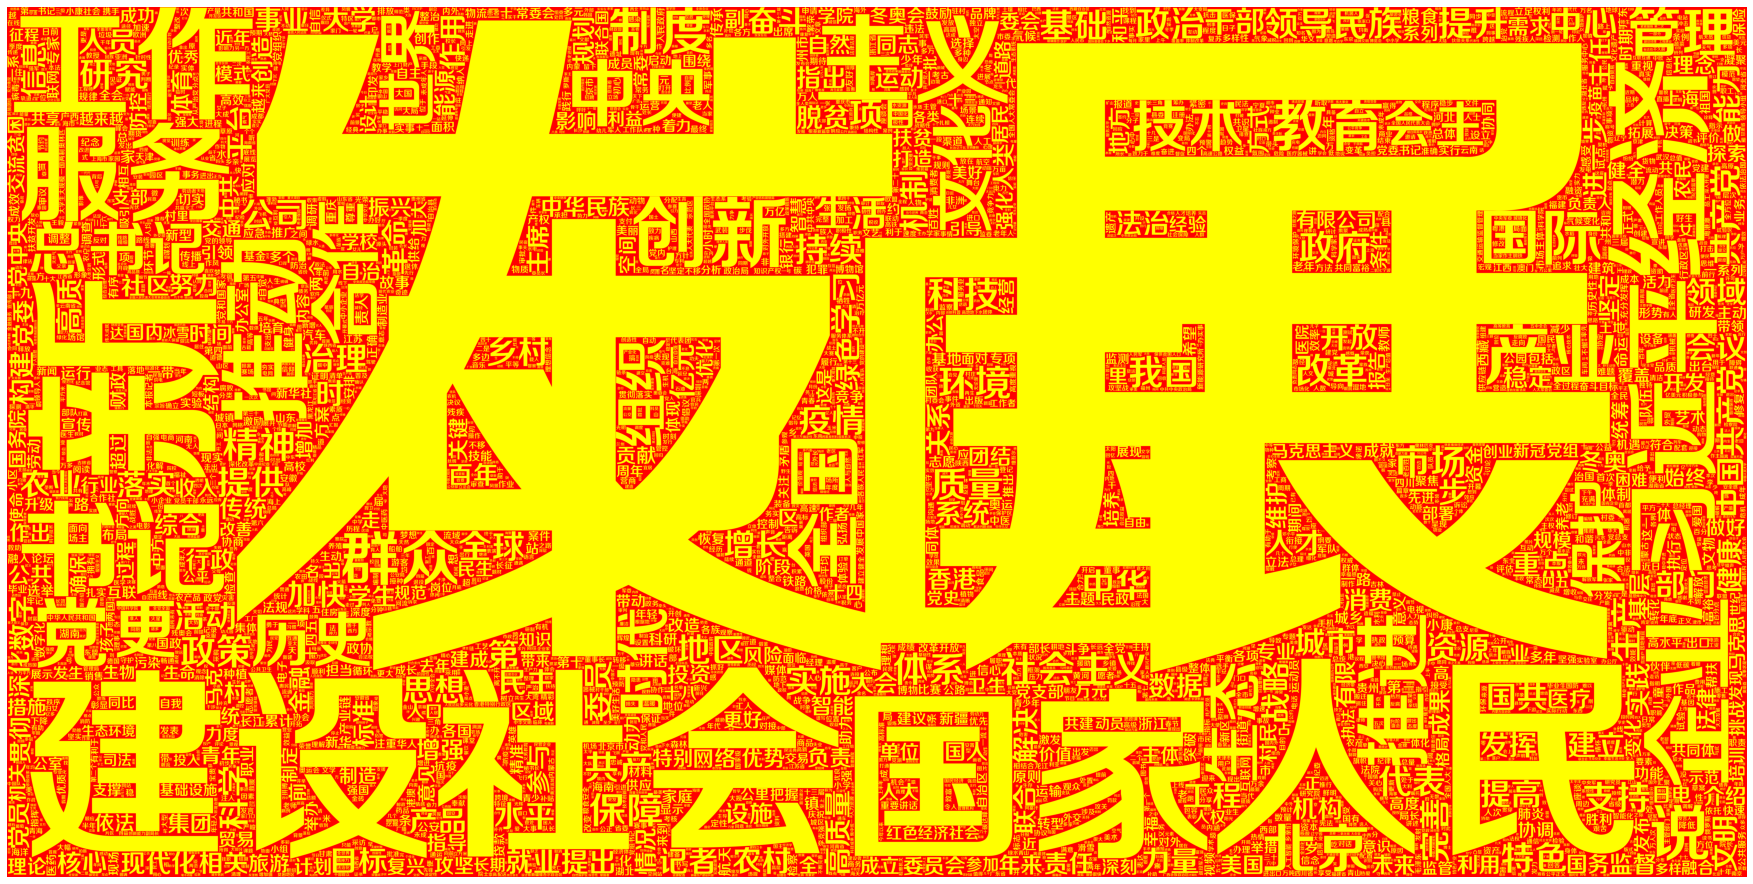

In [21]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=16000,height=8000,background_color="red", max_words=5000,color_func= lambda *args, **kwargs: (255, 255, 0))
wc.generate_from_frequencies(word_count)

wc.to_file("People's Daily WordCloud Zh.png")

plt.figure(figsize=(32,16))
plt.imshow(plt.imread("./People's Daily WordCloud Zh.png"))
plt.axis("off")
plt.show()

### 2.4 translate to English with YouDao API

In [22]:
import json
import requests
import re

def translator(str):
    """
    input : str
    output：translation
    """
    # API
    url = 'http://fanyi.youdao.com/translate?smartresult=dict&smartresult=rule&smartresult=ugc&sessionFrom=null'
    key = {
        'type': "AUTO",
        'i': str,
        "doctype": "json",
        "version": "2.1",
        "keyfrom": "fanyi.web",
        "ue": "UTF-8",
        "action": "FY_BY_CLICKBUTTON",
        "typoResult": "true"
    }
    # key
    response = requests.post(url, data=key)
    if response.status_code == 200:
        
        result = json.loads(response.text)
        translation = result['translateResult'][0][0]['tgt']
        return translation
    else:
        print("failed to use 有道 API")
        return None


In [23]:
translator('英文')

'English'

In [24]:
import re
def removeElse(s:str):
    pattern=r'^The \b|^To \b|\b of$|\b of the$|\b the$|^At the\b|\b are$'
    return re.sub(pattern,"",s)


In [25]:
En_word_count={}
for word in word_ds.head(50).index:
    En_word_count[removeElse(translator(word))]=word_count[word]
 
En_word_ds=pd.DataFrame(En_word_count,index=[0])
En_word_ds=En_word_ds.T
En_word_ds.columns=['count']

En_word_ds.sort_values(by=['count'],ascending=False,inplace=True)
En_word_ds.head(20)

,count
development,53241
China,50722
people's,29041
new,27227
social,26171
construction,25984
countries,25751
work,25046
economic,19610
service,18671


### 2.5 create English WordCloud

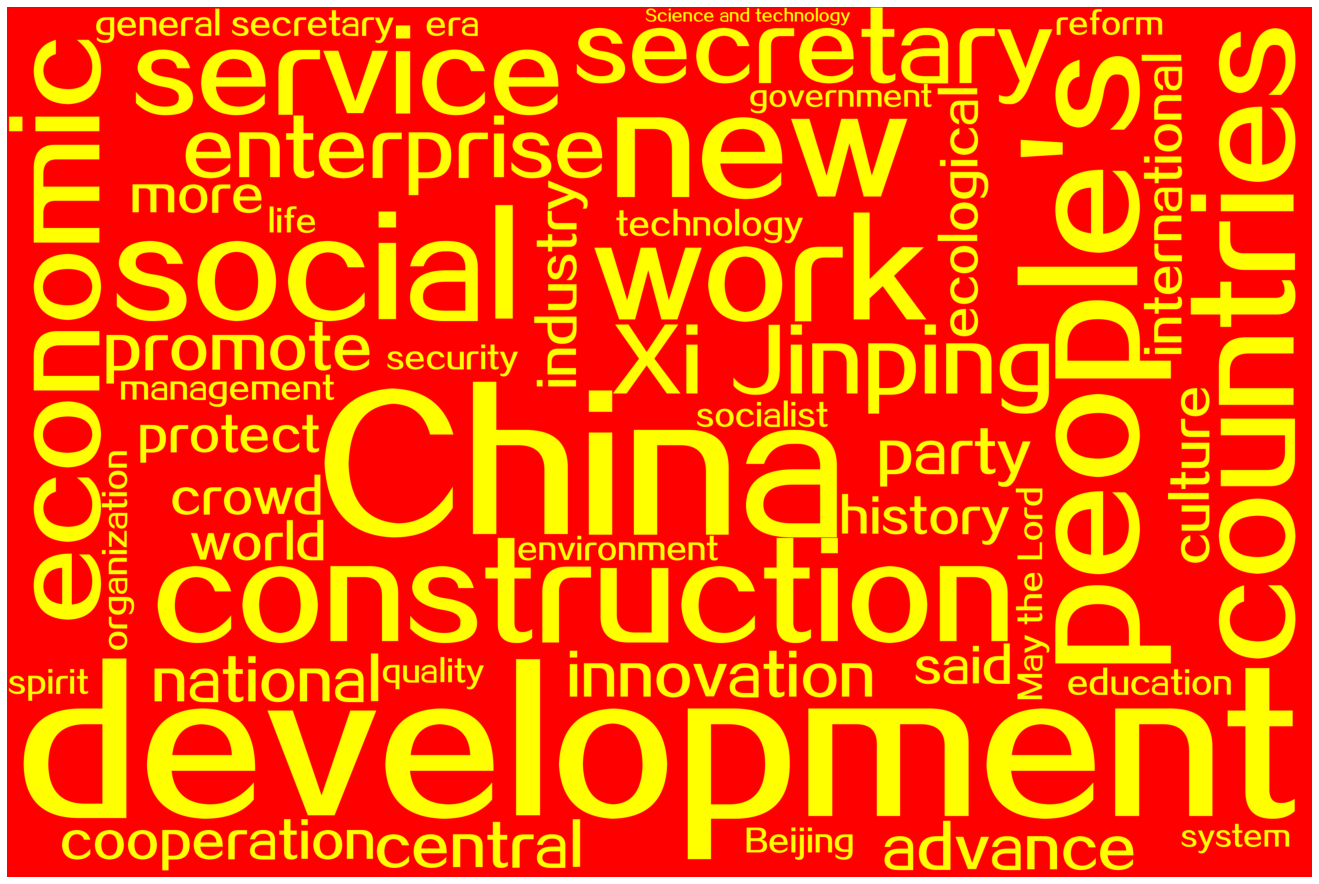

In [26]:
wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func= lambda *args, **kwargs: (255, 255, 0)) # wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(En_word_count)

wc.to_file("People's Daily WordCloud English.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud English.png"))
plt.axis("off")
plt.show()

## 3. mix English and Chinese and generate WordCloud

In [27]:
from random import choice
Rand_word_count={}
for word in word_ds.head(50).index:
    if choice(['En','Zh']) == 'En':
        Rand_word_count[removeElse(translator(word))]=word_count[word]
    else:
        Rand_word_count[word]=word_count[word]
        
Rand_word_ds=pd.DataFrame(Rand_word_count,index=[0])
Rand_word_ds=Rand_word_ds.T
Rand_word_ds.columns=['count']

Rand_word_ds.sort_values(by=['count'],ascending=False,inplace=True)
Rand_word_ds.head(20)

,count
发展,53241
中国,50722
people's,29041
new,27227
社会,26171
建设,25984
国家,25751
工作,25046
economic,19610
service,18671


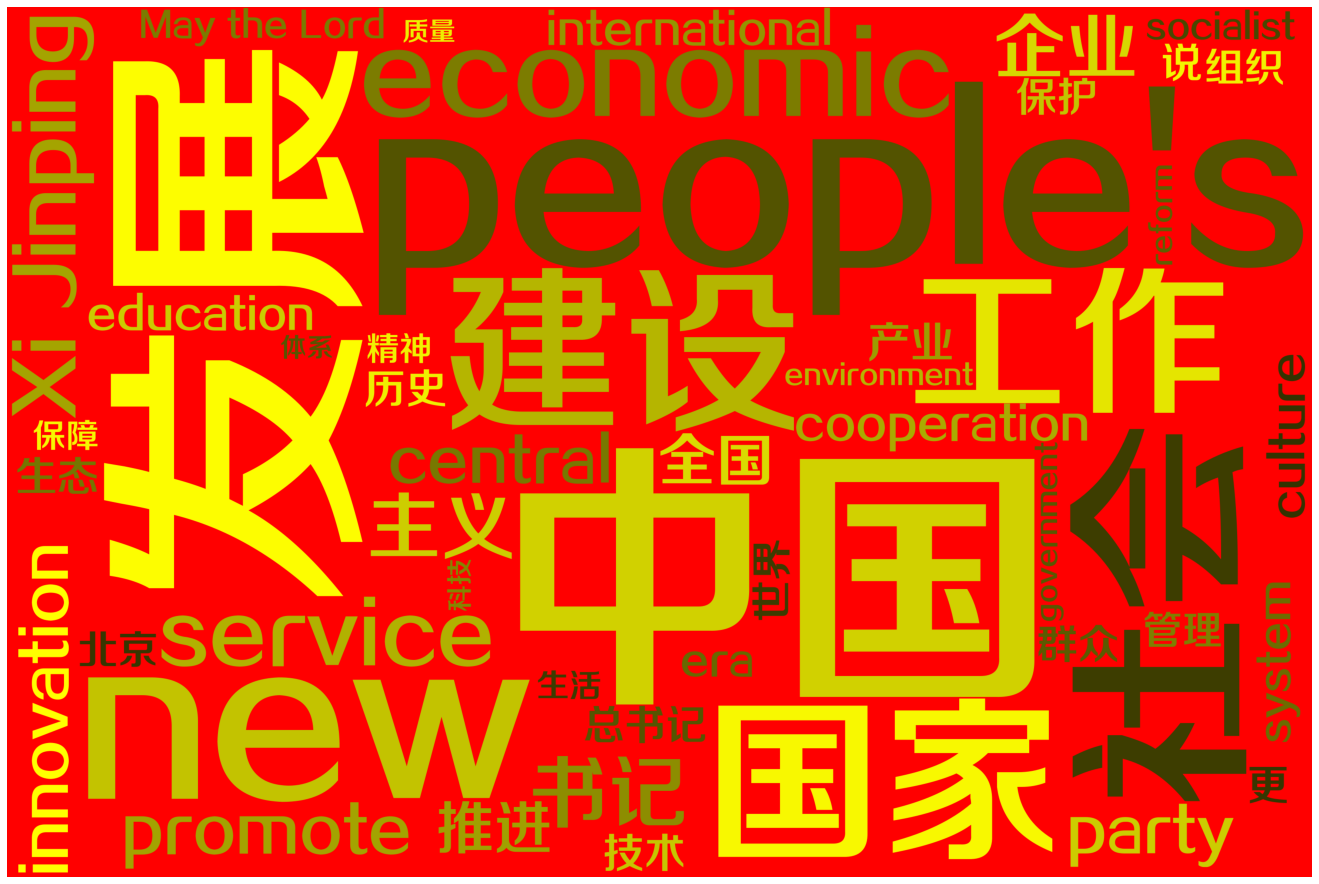

In [28]:
wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(Rand_word_count)

wc.to_file("People's Daily WordCloud Both Zh and En.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud Both Zh and En.png"))
plt.axis("off")
plt.show()